# Harry Potter Series - Character Network Construction

## Fetch Book Text

We'll be using prescraped data made available by Prakhar Mishra (https://github.com/prakhar21) who scrapped down the text of all 7 Harry Potter texts and made them available here: https://github.com/formcept/whiteboard/tree/master/nbviewer/notebooks/data/harrypotter. 

We'll be pull them in and cleaning them for creation of a Harry Potter multiplex network.

In [45]:
#format urls and book titles
book_titles = ["The Philosopher's Stone",
              "The Chamber of Secrets",
              "The Prisoner of Azkaban",
              "The Goblet of Fire",
              "The Order of the Phoenix",
              "The Half Blood Prince",
              "The Deathly Hallows"]
url_base = 'https://raw.githubusercontent.com/formcept/whiteboard/7876044dd8e2f928043ff2fc800d7e30ff72a0cd/nbviewer/notebooks/data/harrypotter/'
space = '%20'
url_names = []
for i in range(len(book_titles)):
    title = book_titles[i]
    book_number = 'Book' + space + str(i+1) + space + '-' + space
    url_names.append(url_base + book_number + title.replace(' ', space) + '.txt')

print(url_names[0])

https://raw.githubusercontent.com/formcept/whiteboard/7876044dd8e2f928043ff2fc800d7e30ff72a0cd/nbviewer/notebooks/data/harrypotter/Book%201%20-%20The%20Philosopher's%20Stone.txt


In [46]:
def strip_puncuation(s):
    punc = ' !()-[]{};:\, <>./?@#$%^&*_~"" '' “”  '
    for char in s: 
        if char in punc:
            s = s.replace(char, ' ')
    return s

In [47]:
#read in text for each book
import requests, re
book_texts = []

for i in range(len(book_titles)):
    #fetch book text and split by line
    r = requests.get(url_names[i])
    text = r.text.split('\n')
    #break text by pages
    book_pages = []
    page_number = 1
    page_text = ''
    for line in text:
        #if page end - update page_number and add to text to book_pages
        if 'Page | ' in line:
            book_pages.append(re.sub(' +',' ', page_text).strip())
            page_text = ''
            page_number += 1
        else: 
            page_text += ' '+strip_puncuation(str(line).strip())
    
    #add book_pages to book_texts
    book_texts.append(book_pages)

In [48]:
book_texts[0][-2]

'It was Ginny Weasley Ron’s younger sister but she wasn’t pointing at Ron Harry Potter she squealed Look Mom I can see Be quiet Ginny and it’s rude to point Mrs Weasley smiled down at them Busy year she said Very said Harry Thanks for the fudge and the sweater Mrs Weasley Oh it was nothing dear Ready are you It was Uncle Vernon still purple faced still mustached still looking furious at the nerve of Harry carrying an owl in a cage in a station full of ordinary people Behind him stood Aunt Petunia and Dudley looking terrified at the very sight of Harry You must be Harry’s family said Mrs Weasley In a manner of speaking said Uncle Vernon Hurry up boy we haven’t got all day He walked away Harry hung back for a last word with Ron and Hermione See you over the summer then Hope you have — er — a good holiday said Hermione looking uncertainly after Uncle Vernon shocked that anyone could be so unpleasant'

## Scrap Character Names from Wikipedia

In [49]:
# Get list of character names
from bs4 import BeautifulSoup
from string import ascii_uppercase

In [50]:
url = "https://en.wikipedia.org/wiki/List_of_Harry_Potter_characters"
r = requests.get(url)
soup = BeautifulSoup(r.content)

In [51]:
def character_names_by_section(section_id = '', end_name = ''):
    heading = soup.find(id = section_id)
    character_names = []
    dash = ['–', '-']
    for h in heading.find_next('h3'):
        for line in h.find_all_next('li'):
            for element in line: 
                #print(element, end = '\n\n')
                name = ''
                if len(element) == 1:
                    name = [e for e in element][0]
                else: 
                    for e in element:
                        if e in dash:
                            break
                        name += str(e)
                character_names += [str(name)]
                if name == end_name:
                    return character_names
                break

In [52]:
# get character names 
characters = character_names_by_section('Characters_by_surname', 'Blaise Zabini ')
characters += character_names_by_section('Characters_with_no_or_unknown_surname', 'Winky ')
characters = [c.strip() for c in characters]
characters.sort()
characters

['Aberforth Dumbledore',
 'Alastor (Mad-Eye) Moody',
 'Albert Runcorn',
 'Albus Dumbledore',
 'Albus Severus Potter',
 'Alecto Carrow',
 'Alice and Frank Longbottom',
 'Alicia Spinnet',
 'Amelia Bones',
 'Amos Diggory',
 'Amycus Carrow',
 'Andromeda Tonks',
 'Angelina Johnson',
 'Anthony Goldstein',
 'Antioch, Cadmus, and Ignotus Peverell',
 'Antonin Dolohov',
 'Arabella Figg',
 'Aragog',
 'Argus Filch',
 'Ariana Dumbledore',
 'Arthur Weasley',
 'Astoria Greengrass',
 'Augusta Longbottom',
 'Augustus Rookwood',
 'Aurora Sinistra',
 'Bane',
 'Barty Crouch Jr',
 'Barty Crouch Sr',
 'Bathilda Bagshot',
 'Beedle the Bard',
 'Bellatrix Lestrange',
 'Bertha Jorkins',
 'Bill Weasley',
 'Blaise Zabini',
 'Bob Ogden',
 'Bogrod',
 'Buckbeak',
 'Cedric Diggory',
 'Charity Burbage',
 'Charlie Weasley',
 'Cho Chang',
 'Colin Creevey',
 'Corban Yaxley',
 'Cormac McLaggen',
 'Cornelius Fudge',
 'Crabbe',
 'Crookshanks',
 'Cuthbert Binns',
 'Dean Thomas',
 'Dedalus Diggle',
 'Demelza Robins',
 'Dennis

In [53]:
# Clean up Multinames
for i, name in enumerate(characters): 
    if name == 'Alice and Frank Longbottom':
        characters[i] = 'Alice Longbottom'
        characters += ['Frank Longbottom']
    elif name == 'Antioch, Cadmus, and Ignotus Peverell':
        characters[i] = 'Antioch Peverell'
        characters += ['Cadmus Peverell']
        characters += ['Ignotus Peverell']
    elif name == 'Helena Ravenclaw/The Grey Lady':
        characters[i] = 'Helena Ravenclaw'

characters.sort()
characters

['Aberforth Dumbledore',
 'Alastor (Mad-Eye) Moody',
 'Albert Runcorn',
 'Albus Dumbledore',
 'Albus Severus Potter',
 'Alecto Carrow',
 'Alice Longbottom',
 'Alicia Spinnet',
 'Amelia Bones',
 'Amos Diggory',
 'Amycus Carrow',
 'Andromeda Tonks',
 'Angelina Johnson',
 'Anthony Goldstein',
 'Antioch Peverell',
 'Antonin Dolohov',
 'Arabella Figg',
 'Aragog',
 'Argus Filch',
 'Ariana Dumbledore',
 'Arthur Weasley',
 'Astoria Greengrass',
 'Augusta Longbottom',
 'Augustus Rookwood',
 'Aurora Sinistra',
 'Bane',
 'Barty Crouch Jr',
 'Barty Crouch Sr',
 'Bathilda Bagshot',
 'Beedle the Bard',
 'Bellatrix Lestrange',
 'Bertha Jorkins',
 'Bill Weasley',
 'Blaise Zabini',
 'Bob Ogden',
 'Bogrod',
 'Buckbeak',
 'Cadmus Peverell',
 'Cedric Diggory',
 'Charity Burbage',
 'Charlie Weasley',
 'Cho Chang',
 'Colin Creevey',
 'Corban Yaxley',
 'Cormac McLaggen',
 'Cornelius Fudge',
 'Crabbe',
 'Crookshanks',
 'Cuthbert Binns',
 'Dean Thomas',
 'Dedalus Diggle',
 'Demelza Robins',
 'Dennis Creevey',


## Make Synonym Dictionary

We create a dictionary to contain any names that may be associated with the characters full name. By design characters with the same first name may have the same synonym. By making this choice, we will often over count the number of times certain characters appear in the text (e.g. Albus Dumbledore, Albus Severus Potter).

We also remove certain articles from characters name (e.g. 'The Bloody Barron', 'Sir Cadogan', 'Mrs. Cole') to ensure articles don't get counted towards these characters.

In [54]:
# make id_to_character and character_to_id dictitionaries
id_dict = {}; id_to_char_dict = {}
for i in range(len(characters)):
    id_dict[characters[i]] = i
    id_to_char_dict[i] = characters[i]

In [55]:
#Create rough synonym dictionary
synonym_dict = {}
for name in characters:
    if any(element in name for element in ['The', 'Sir', 'Mrs.', 'Nearly', 'Great', 'Madam', 'Lord']):
        synonym_dict[name] = [' '.join(name.split()[1:])]
    else:
        synonym_dict[name] = [name, name.split()[0] +' ']

In [56]:
# Add custom synonyms - subjectively added. Several possible additions. 

# Professors - adding last names
synonym_dict['Alastor (Mad-Eye) Moody'] += ['Mad-Eye ', 'Moody ']
synonym_dict['Dolores Umbridge'] += ['Umbridge ']
synonym_dict['Albus Dumbledore'] += ['Dumbledore ']
synonym_dict['Severus Snape'] += ['Snape ']
synonym_dict['Minerva McGonagall'] += ['McGonagall ']
synonym_dict['Gilderoy Lockhart'] += ['Lockhard ']
synonym_dict['Remus Lupin'] += ['Lupin ']
synonym_dict['Rubeus Hagrid'] += ['Hagrid ']
synonym_dict['Horace Slughorn'] += ['Slughorn ']
synonym_dict['Aurora Sinistra'] += ['Sinistra ']
synonym_dict['Irma Pince'] += ['Pince ']
synonym_dict['Quirinus Quirrell'] += ['Quirrell ']
synonym_dict['Rolanda Hooch'] += ['Hooch ']
synonym_dict['Septima Vector'] += ['Vector ']
synonym_dict['Silvanus Kettleburn'] += ['Kettleburn ']

#Other additions
synonym_dict['Corban Yaxley'] += ['Yaxley ']
synonym_dict['Viktor Krum'] += ['Krum ']
synonym_dict['Garrick Ollivander'] += ['Ollivander ']

#print out synonym_dict
synonym_dict

{'Aberforth Dumbledore': ['Aberforth Dumbledore', 'Aberforth '],
 'Alastor (Mad-Eye) Moody': ['Alastor (Mad-Eye) Moody',
  'Alastor ',
  'Mad-Eye ',
  'Moody '],
 'Albert Runcorn': ['Albert Runcorn', 'Albert '],
 'Albus Dumbledore': ['Albus Dumbledore', 'Albus ', 'Dumbledore '],
 'Albus Severus Potter': ['Albus Severus Potter', 'Albus '],
 'Alecto Carrow': ['Alecto Carrow', 'Alecto '],
 'Alice Longbottom': ['Alice Longbottom', 'Alice '],
 'Alicia Spinnet': ['Alicia Spinnet', 'Alicia '],
 'Amelia Bones': ['Amelia Bones', 'Amelia '],
 'Amos Diggory': ['Amos Diggory', 'Amos '],
 'Amycus Carrow': ['Amycus Carrow', 'Amycus '],
 'Andromeda Tonks': ['Andromeda Tonks', 'Andromeda '],
 'Angelina Johnson': ['Angelina Johnson', 'Angelina '],
 'Anthony Goldstein': ['Anthony Goldstein', 'Anthony '],
 'Antioch Peverell': ['Antioch Peverell', 'Antioch '],
 'Antonin Dolohov': ['Antonin Dolohov', 'Antonin '],
 'Arabella Figg': ['Arabella Figg', 'Arabella '],
 'Aragog': ['Aragog', 'Aragog '],
 'Argus Fi

## Construct Adjacency Matrices

Two characters will share an edge if their names - or a synonym of their name - shows up on a page in common. The edige will be associated with a weight to indicate if there are multiple pages where both names occur. 

To do so, we first traverse over all _pairs_ , _triples_ , or _quadruples_ of words looking for a character's full name. If we see a characters full name, we incriment the local dictionary to denote that character is on the page. We then remove that name from the page and keep over characters. After this is complete, we then loop over first / last names in the same way. Finally, we place an edge between all characters that showed up on that page.

In [57]:
import numpy as np
from scipy import sparse

def page_to_id_list(page):
    id_list = []
    for character in characters: 
        char_list = synonym_dict[character]
        if any(char_name in page for char_name in char_list):
            id_list += [id_dict[character]]
    return id_list

def get_book_adjacency_matrix(characters, book_id):
    #initialize Adjacency matrix 
    n = len(id_dict)
    A = np.zeros((n,n))
    
    #loop over pages and add weights
    for page in book_texts[book_id]:
        char_ids = page_to_id_list(page)
        for i in char_ids:
            for j in char_ids:
                A[i,j] += 1
    
    #return adjacency matrices
    return(A)

In [58]:
#fetch adjacency matrices
A_mat = [get_book_adjacency_matrix(characters, i) for i in range(len(book_titles))]

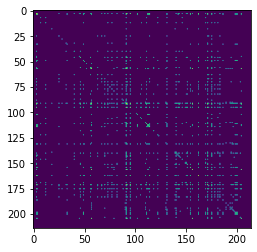

In [60]:
import matplotlib.pyplot as plt
plt.imshow(np.log(A_mat[0] + .001))

If a character was not mentioned in any of the books - we should remove them from the adjacency matrix and corresponding dictionaries / lists.

In [61]:
#find which ids to remove
A_sum = sum(A_mat)
ids_to_remove = []
for i in range(A_sum.shape[0]):
    if A_sum[i, :].sum() == 0:
        #remove character i 
        ids_to_remove += [i]
    
#remove them from the characters list
characters_trimmed = characters[:] # full copy
for ids in ids_to_remove: 
    del characters_trimmed[ids]

#update dictionaries
name_to_id = {}; id_to_name = {}
for i in range(len(characters_trimmed)):
    name_to_id[characters_trimmed[i]] = i
    id_to_name[i] = characters_trimmed[i]

#update adjacency matices
def delete_row_column(M, ind_list):
    mat = M.copy()
    mat = np.delete(mat, ind_list, 0)
    mat = np.delete(mat, ind_list, 1)
    return(mat)

A_mats_trimmed = [delete_row_column(A, ids_to_remove) for A in A_mat]
A_mats_trimmed[0].shape

(211, 211)

In [62]:
# write out networks
import os 
def write_net(mat_ind, filename):
    np.savetxt(os.getcwd() + '/../adj_matrices/'+ filename, A_mats_trimmed[mat_ind])
    
for i in range(len(A_mat)):
    fname = re.sub("'",'', re.sub(' ', '_', book_titles[i][4:]))+ '_adj_matrix'
    write_net(i, fname)

In [63]:
#write out dictionaries
def write_dict(fname, d):
    path = os.getcwd() + '/../dictionaries/'
    f = open(path + fname, 'w')
    f.write(str(d))
    f.close()


write_dict('name_to_id', name_to_id)
write_dict('id_to_name', id_to_name)
write_dict('characters_list', characters_trimmed)